<a href="https://colab.research.google.com/github/rucool/carpenter_mixing_2016/blob/main/Model1/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

!git clone https://github.com/rucool/carpenter_mixing_2016.git

# Get the path to the cloned repository
repo_path = os.path.join('/content', 'carpenter_mixing_2016', 'Model1')  # Replace with your repository name

# Add the repository path to sys.path
sys.path.append(repo_path)
print(repo_path)
# Import the functions
from model1_functions import *

fatal: destination path 'carpenter_mixing_2016' already exists and is not an empty directory.
/content/carpenter_mixing_2016/Model1


In [2]:
pper = ['setup','peak','breakdown']
#initial profiles csv for set up peak and breakdown based on glider profiles
#these intial profiles are 25m
init_profs = pd.read_csv('https://raw.githubusercontent.com/rucool/carpenter_mixing_2016/7b446192e5fe633f36e149ab98ee3d876e929e44/Glider_Data/carp_pea_init_profs.csv')

res_df = None #initialize none to concat result dataframe to for each period
extend = False
dmax_extend = 40 #depth you want profile extended to
dz = 0.25




for ii,per in enumerate(pper):
    print(per)
    init_df = init_profs[init_profs.per==per]
    # if we want this extended to 40m
    if extend == True:
        dmin_extend = init_df['z'].iloc[-1].astype(int)+dz
        z_extend = np.arange(dmin_extend,dmax_extend+dz,dz)
        dens_extend = [init_df['dens'].iloc[-1]]*len(z_extend)
        mldL_extend = [init_df['mldL'].iloc[-1]]*len(z_extend)
        mldU_extend = [init_df['mldU'].iloc[-1]]*len(z_extend)
        p_thick_extend = [init_df['p_thick'].iloc[-1]]*len(z_extend)
        pea_extend = [init_df['pea'].iloc[-1]]*len(z_extend)
        per_extend = [init_df['per'].iloc[-1]]*len(z_extend)
        extend_df = pd.DataFrame({'z':z_extend,'dens':dens_extend,'mldU':mldU_extend,'mldL':mldL_extend,'p_thick':p_thick_extend,'pea':pea_extend,'per':per_extend})

        init_df = pd.concat([init_df,extend_df],ignore_index=True)




    ## model

    datasave_Pstr_H=[]
    datasave_Pstr_L=[]
    datasave_L_D = []
    datasave_H_D = []

    #params from initial compisite profiles
    H = init_df['z'].iloc[-1].astype(int)


    dens = init_df['dens'].values
    mldU_g = init_df['mldU'].iloc[0].astype(int)
    mldL_g = init_df['mldL'].iloc[0].astype(int)

    #change to z up positive like carpenter
    z = np.flipud(init_df['z'].values)
    mldL_c = H-mldL_g
    mldU_c = H-mldU_g

    b=mldU_c-mldL_c #pycnocline thickness
    h = (mldU_c+mldL_c)/2 #height off bottom to center of pycnocline



    rho_s = init_df['dens'].iloc[0].astype(int) #surface dens
    rho_b = init_df['dens'].iloc[-1].astype(int) #bottom dens


    #params replicated from Carpenter et al., 2016
    CDL = 0.35          # Low Drag Coefficient (dimensionless)
    CDH = 1.0           # High Drage Coefficient (dimensionless)

    D = 11.28           # Diameter of Monopile Turbine foundation (m)
    l = 1000            # Turbine Spaceing (m)

    rho0 =1026 #np.trapz(dens,dx=dz,axis=0)/H #1026 #Reference Ocean Density (kg/m^3)
    g = 9.81            # Acceleration Due to Gravity (m/s^2)
    Rif = 0.17  #flux richardson number

    # Calculate Phi (kj/m2)
    phi = phi_carpenter(dens,z,dz,H)
    phi = phi*1000 #bring back to SI units for Pstr calculation


    #range of current velocities covering tidal to storm driven magnitudes
    u = np.arange(0.01,0.81,0.01)
    for uu in u:
        uu = np.round(uu,2)
        print(uu)
        Pstr_L, Pstr_H = Pstr (CDL,CDH,D,l,rho0,uu,H)
        datasave_Pstr_L.append(Pstr_L)
        datasave_Pstr_H.append(Pstr_H)
        tau_mix_L = Tau_mix_L (phi,H,Rif,Pstr_L,b)
        tau_mix_H = Tau_mix_H (phi,H,Rif,Pstr_H,b)
        datasave_L_D.append(tau_mix_L)
        datasave_H_D.append(tau_mix_H)

    data = {
        'Current Velocity': u,
        'Pstr CD = 0.35': datasave_Pstr_L,
        'Pstr CD = 1.0': datasave_Pstr_H,
        'Tmix CD = 0.35': datasave_L_D,
        'Tmix CD 1.0': datasave_H_D,
        'h':[h]*len(u),
        'per':[per]*len(u)
    }
    #create and concat all dataframes into res_df
    df = pd.DataFrame(data)

    if res_df is None:
        res_df = df
    else:
        res_df = pd.concat([res_df,df])


setup
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
peak
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
breakdown
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4

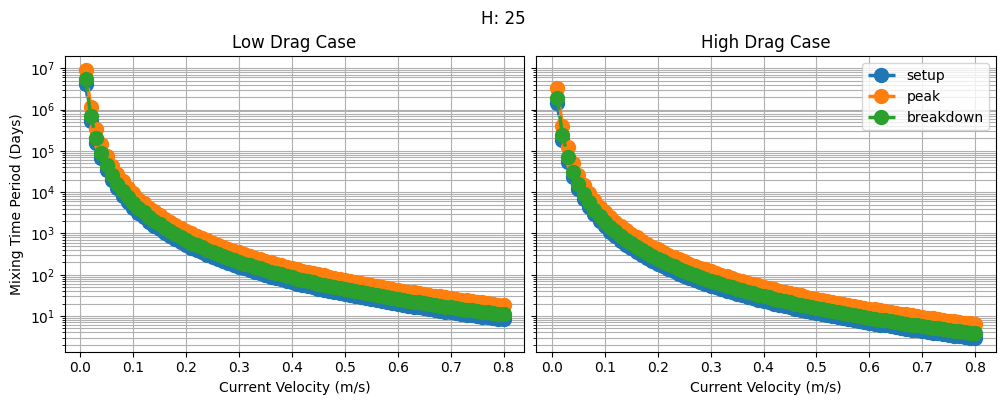

In [3]:
plot_model_results(res_df,H)